# Visualization and exploratory analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [9]:
df = pd.read_csv(
    "http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv",
    index_col=0,
)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [11]:
sns.set(context="talk", style="ticks")

%matplotlib inline

## Matplotlib

Matplotlib can plot labeled data now I guess

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x="carat", y="depth", data=df, c="k", alpha=0.15)

## Pandas built-int

<div class="alert alert-block alert-info">
    <H3>Techniques of note</H3>
    <li><b><code>pandas_datareader</code></b> library to pull data from various sources into a DataFrame</li>
</div>

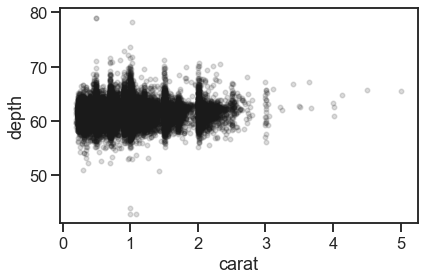

In [13]:
df.plot.scatter(x="carat", y="depth", c="k", alpha=0.15)
plt.tight_layout()

Convenient to plot in when index is timeseries

/Users/pcosta/Library/Caches/pypoetry/virtualenvs/modern-pandas-gheCaqJK-py3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


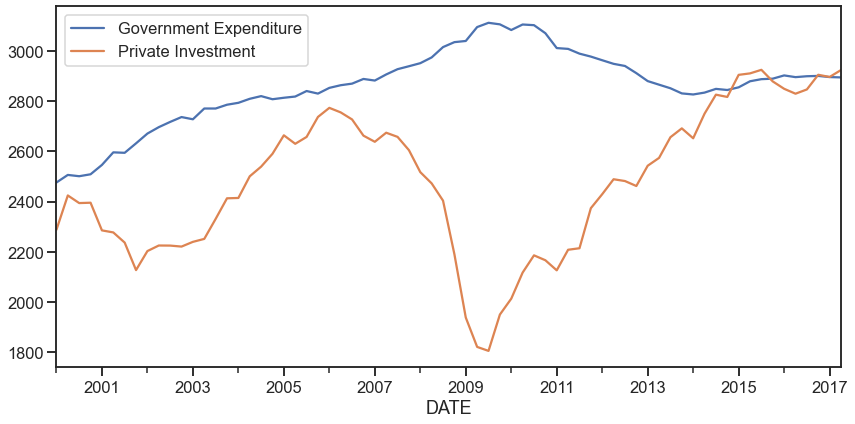

In [15]:
from pandas_datareader import fred

gdp = fred.FredReader(["GCEC96", "GPDIC96"], start="2000-01-01").read()
gdp.rename(
    columns={"GCEC96": "Government Expenditure", "GPDIC96": "Private Investment"}
).plot(figsize=(12, 6))
plt.tight_layout()

In [16]:
gdp.head()

,GCEC96,GPDIC96
DATE,,
2000-01-01,2476.222,2287.827
2000-04-01,2506.392,2424.549
2000-07-01,2501.218,2394.141
2000-10-01,2508.965,2395.566
2001-01-01,2546.270,2285.261


## Seaborn

<div class="alert alert-block alert-info">
    <h3>Techniques of note</h3>
    <h4>Pandas</h4>
    <li><b><code>.quantile</code></b> get the value of a certain quantile per column</li>
    <li><b><code>.all</code></b> to test if all values in a column are True</li>
    <h4>Seaborn</h4>
    <li><b><code>countplot</code></b> histogram</li>
    <li><b><code>jointplot</code></b> scatter</li>
    <li><b><code>pairplot</code></b> pairwise scatter and histogram</li>
    <li><b><code>PairGrid</code></b> to make a seaborn grid of pairs</li>
    <li><b><code>FacetGrid</code></b> to make a seaborn grid of different values</li>
    <li><b><code>catplot</code></b> to make a seaborn out of different categories</li>
    <li><b><code>.map</code></b> For assigning different plots seaborn <code>Grid</code>s</li>
    <li><b><code>.map_upper/.map_diag/.map_lower</code></b> For assigning different plots to <code>PairGrid</code></li>
    
</div>

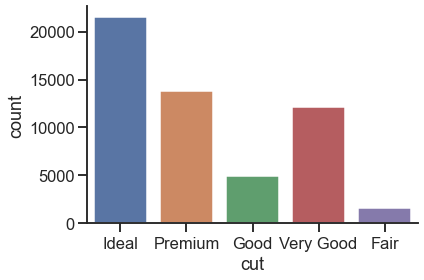

In [17]:
sns.countplot(x="cut", data=df)
sns.despine()
plt.tight_layout()

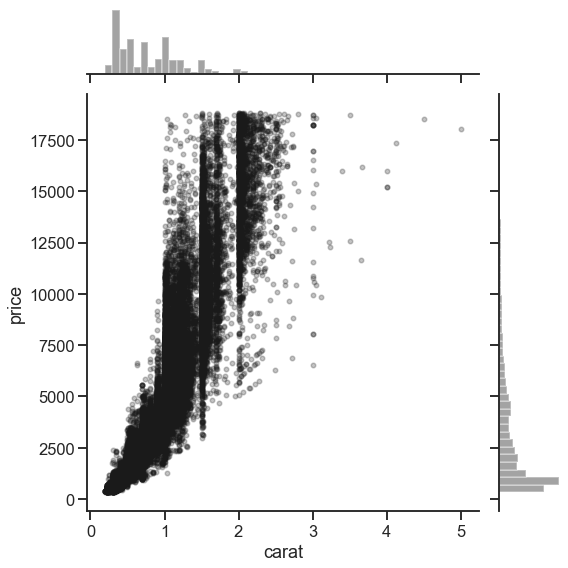

In [27]:
sns.jointplot(x="carat", y="price", data=df, height=8, alpha=0.25, color="k", marker=".")
plt.tight_layout()

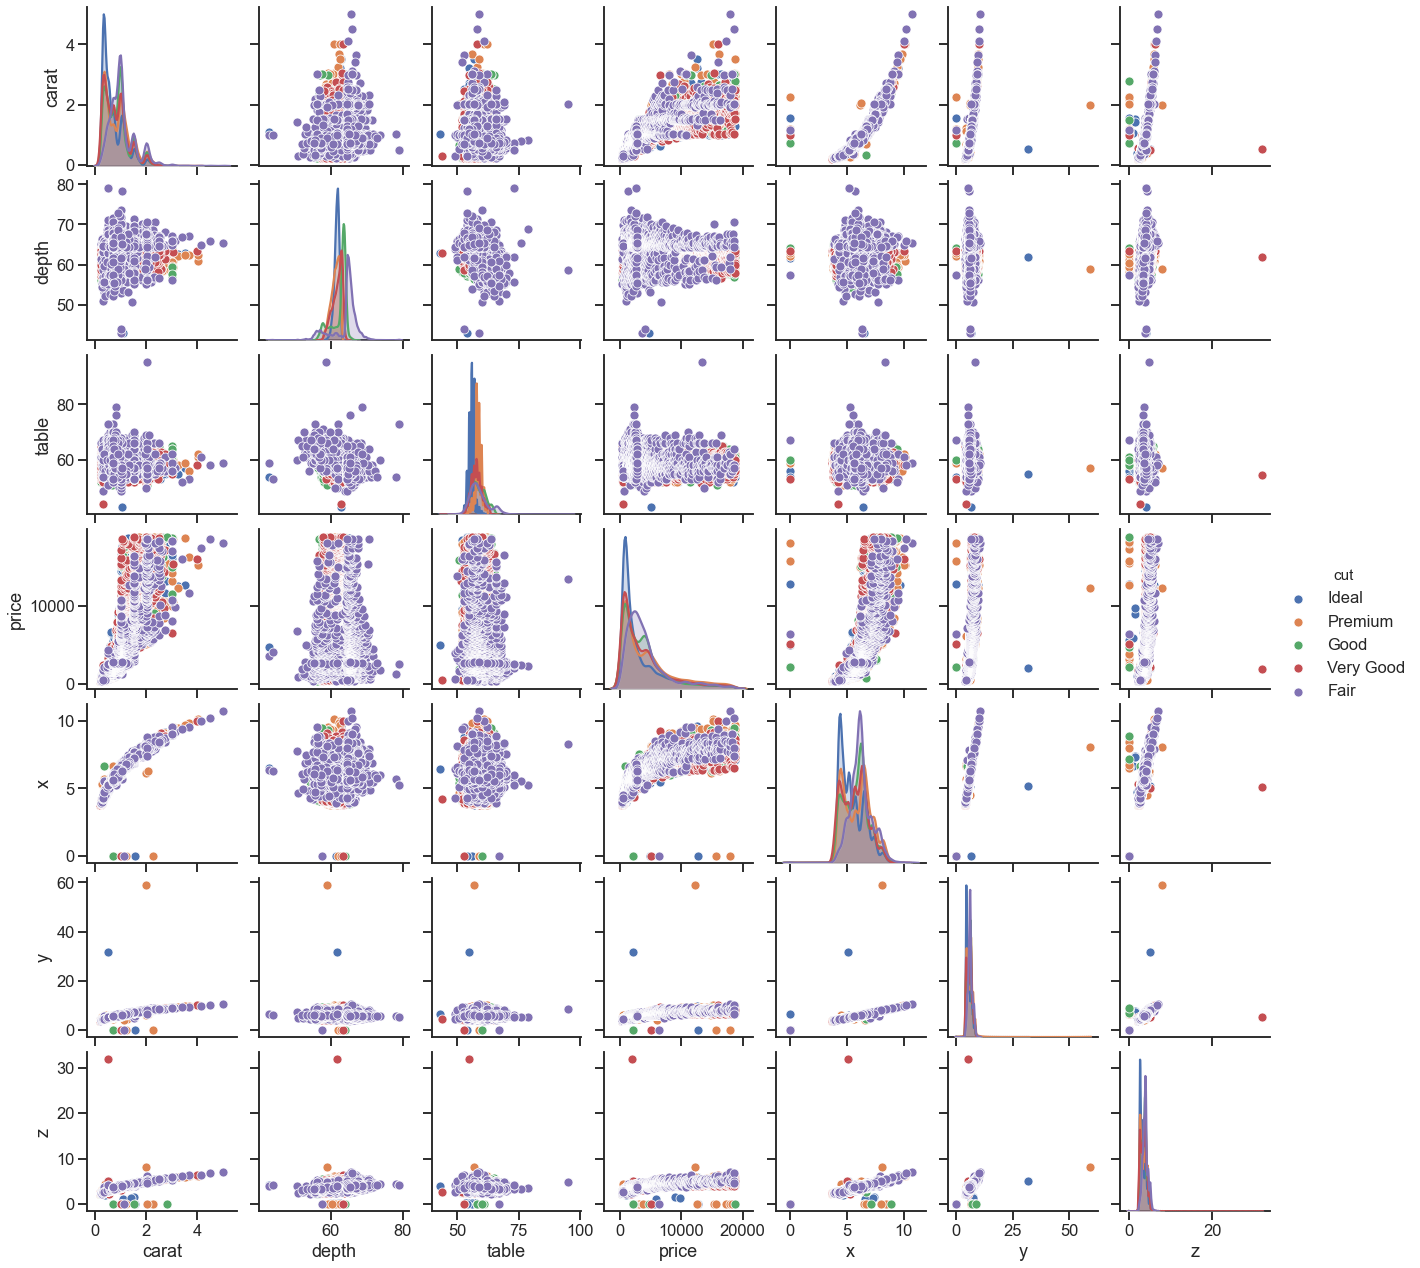

In [19]:
g = sns.pairplot(df, hue="cut")

Seaborn has `Grid`s—which you can use to plot functions over each axis.

In [28]:
def core(df, α=0.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

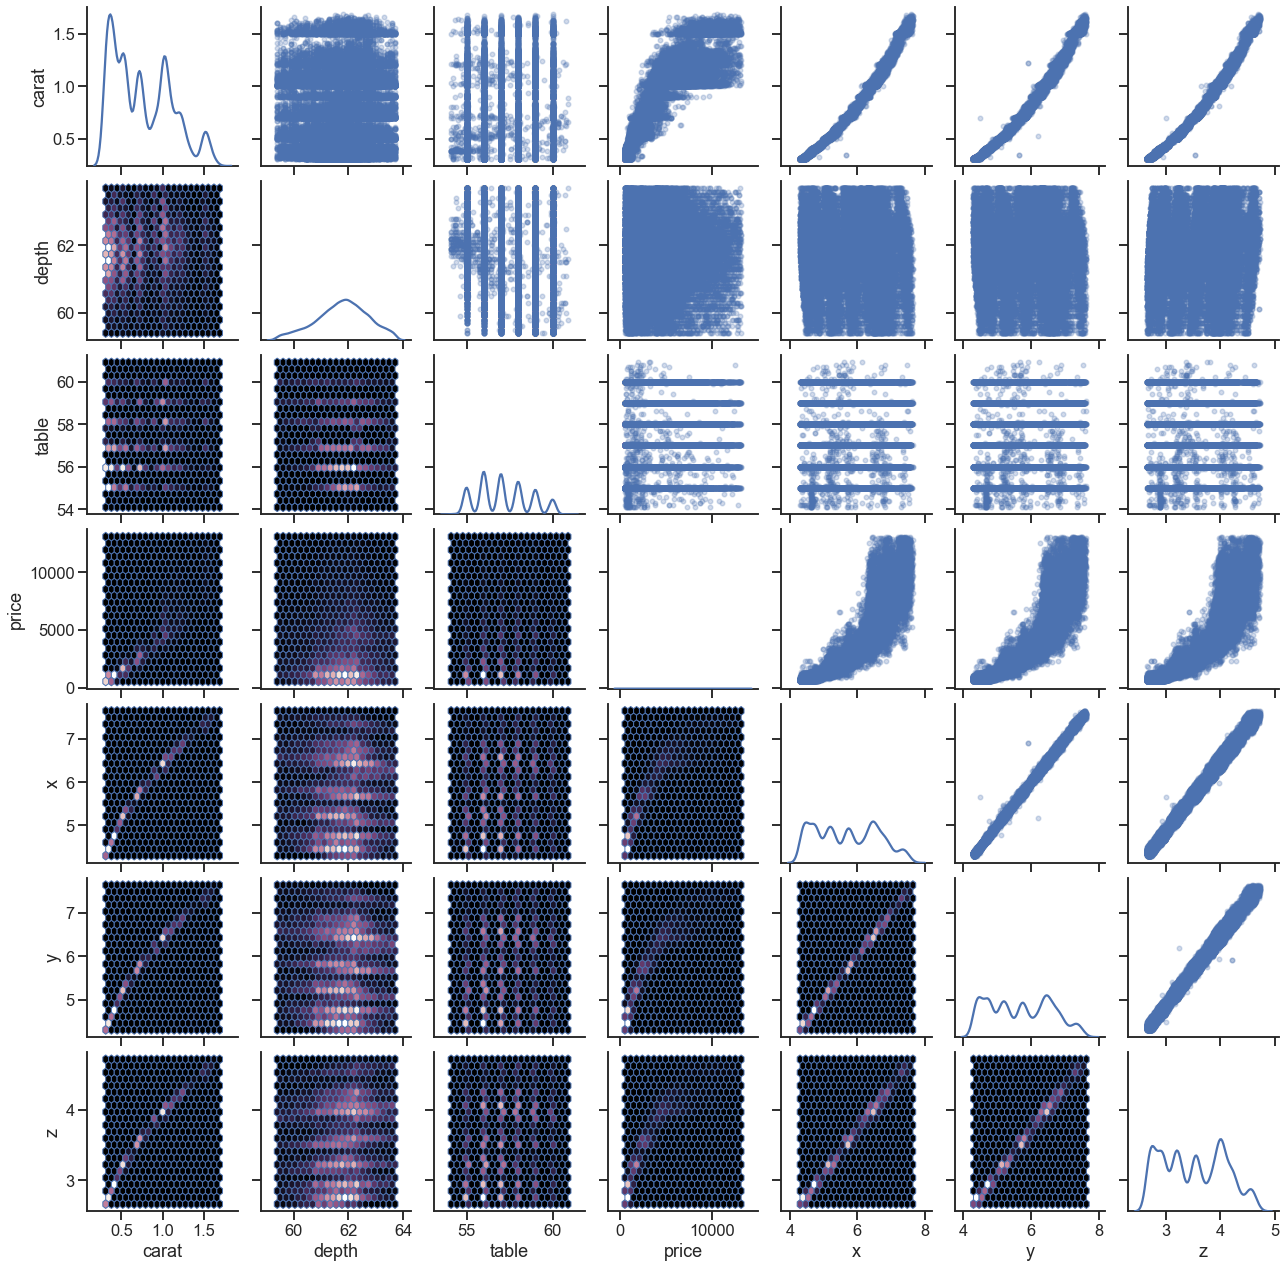

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(
    df.select_dtypes(include=[np.number])
    .pipe(core)
    .pipe(sns.PairGrid)
    .map_upper(plt.scatter, marker=".", alpha=0.25)
    .map_diag(sns.kdeplot)
    .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

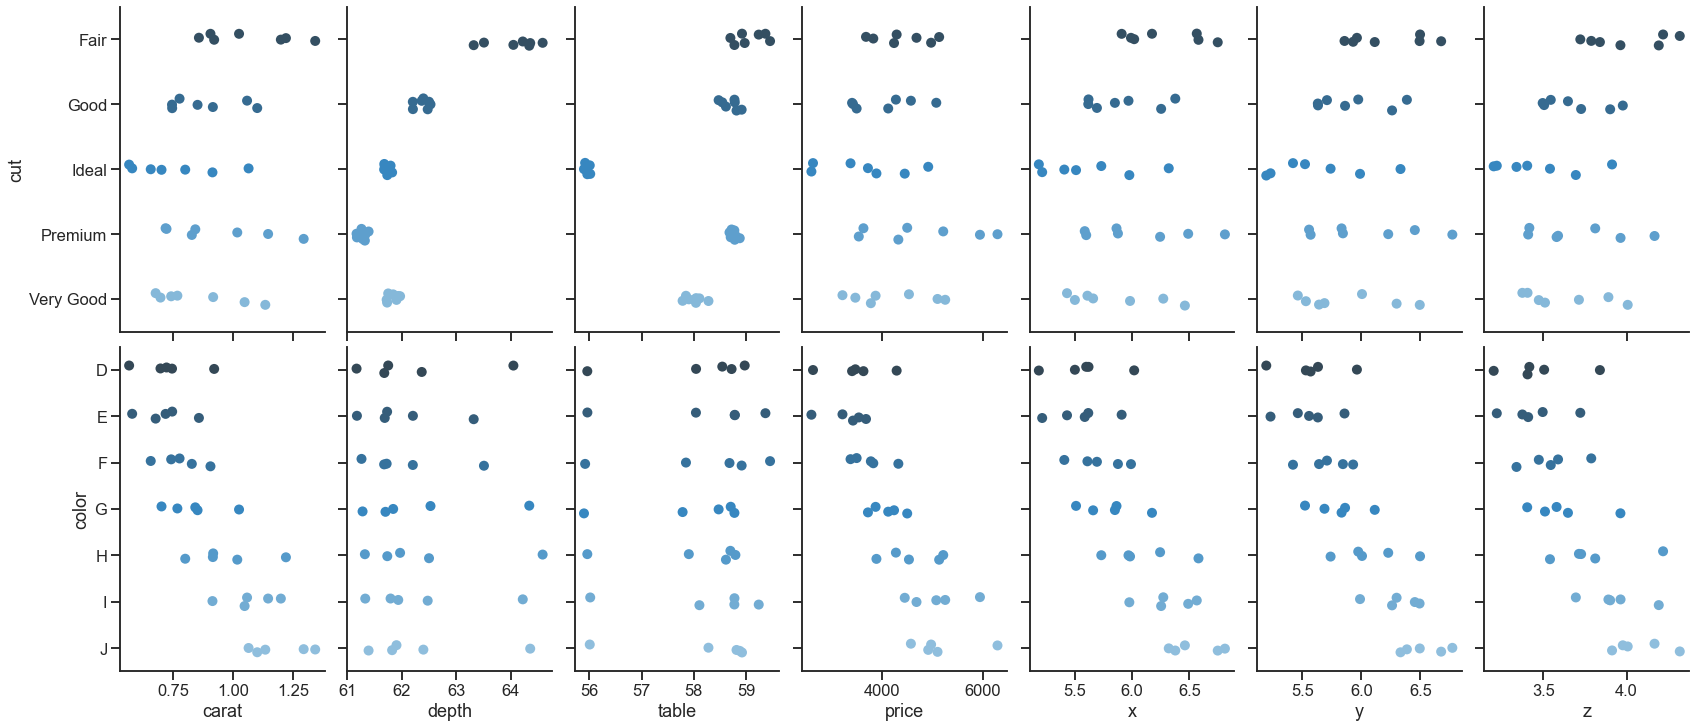

In [44]:
agged = df.groupby(["cut", "color"]).mean().sort_index().reset_index()

g = sns.PairGrid(
    agged, x_vars=agged.columns[2:], y_vars=["cut", "color"], size=5, aspect=0.65
)
g.map(sns.stripplot, orient="h", size=10, palette="Blues_d");

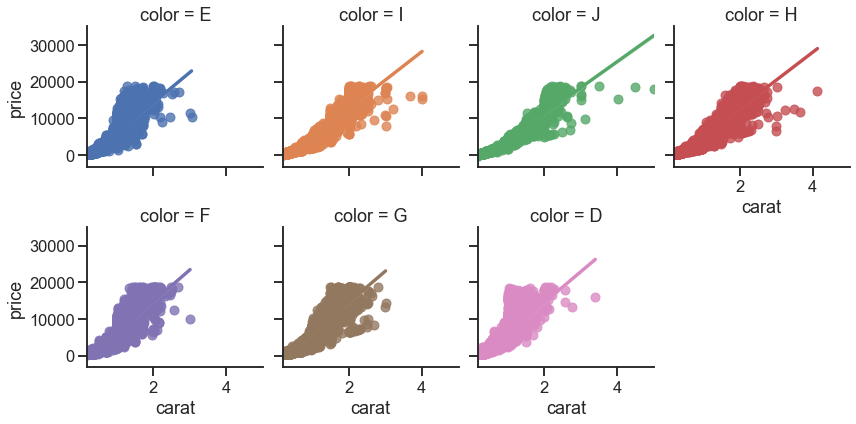

In [45]:
g = sns.FacetGrid(df, col="color", hue="color", col_wrap=4)
g.map(sns.regplot, "carat", "price");

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
df = sns.load_dataset("titanic")

clf = RandomForestClassifier()
param_grid = dict(
    max_depth=[1, 2, 5, 10, 20, 30, 40],
    min_samples_split=[2, 5, 10],
    min_samples_leaf=[2, 3, 5],
)
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df["survived"]
X = df.drop(["survived", "who", "alive"], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y);

In [48]:
scores = pd.DataFrame(est.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121672,0.000690,0.008470,0.000349,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.798883,0.803371,0.820225,0.786517,0.808989,0.803597,0.011132,50
1,0.114781,0.010868,0.008202,0.000337,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.743017,0.797753,0.825843,0.780899,0.797753,0.789053,0.027169,56
2,0.108468,0.004964,0.008266,0.000129,1,2,10,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.748603,0.792135,0.808989,0.780899,0.792135,0.784552,0.020089,58
3,0.103032,0.005128,0.008140,0.000109,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.731844,0.803371,0.808989,0.786517,0.769663,0.780077,0.027766,60
4,0.099980,0.000633,0.008105,0.000136,1,3,5,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.731844,0.797753,0.808989,0.741573,0.786517,0.773335,0.030892,62


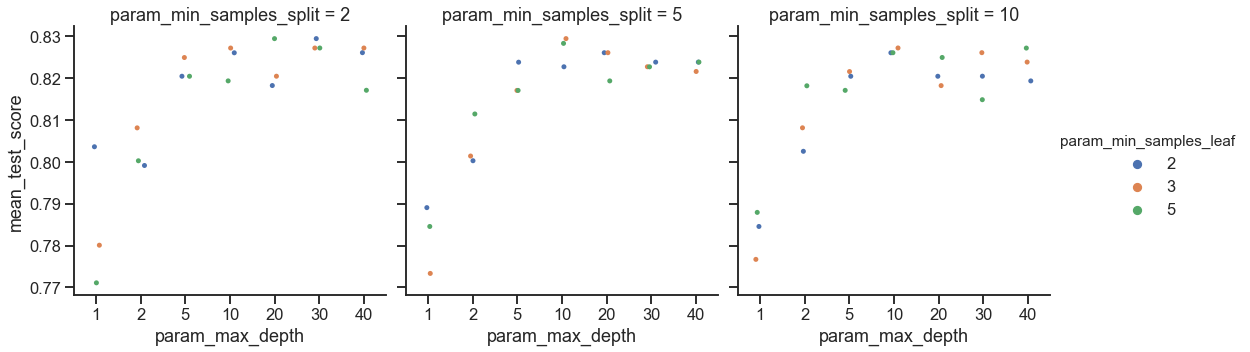

In [50]:
sns.catplot(
    x="param_max_depth",
    y="mean_test_score",
    col="param_min_samples_split",
    hue="param_min_samples_leaf",
    data=scores,
);